# ​Sentiment Analysis and Rating Prediction of Moving Reviews

#### Dataset : TMDB Movie Reviews

![png]('\images/tmdb.png')

In this part of the project lets focuses on applying Natural Language Processing (NLP) techniques to analyze a dataset of movie reviews. We can leverage NLP tools such as NLTK, SpaCy, wordcloud, and Scikit-Learn to explore, analyze, and model text data. The ultimate goal is to establish a relationship between the textual content of the reviews and their associated ratings and subsequently predict these ratings.

TMDB movie reviews ratings range from 1 to 10
- This dataset is collected from tmdbsimple python wrapper for TMDB API. Please read more detail about movie review license [here](https://developer.themoviedb.org/docs/getting-started)

Task to complete :
- Create new folder and save downloaded reviews in it.

- Data Preprocessing
- EDA and Visualization
- Evaluation and Reporting



## Data Preprocessing


### Inspect the data

In [1]:
# Lets use the custom function to load all the data with autoreload option

%load_ext autoreload
%autoreload 2

import custom_function as fn

In [2]:
# load imports
import matplotlib.pyplot as plt
import missingno
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

pd.set_option("display.max_columns",50)
pd.set_option('display.max_colwidth', 250)

In [3]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [4]:
df = pd.read_csv("Data/movie_reviews.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       8650 non-null   object 
 1   movie_id        8650 non-null   int64  
 2   imdb_id         8650 non-null   object 
 3   original_title  8650 non-null   object 
 4   review          8650 non-null   object 
 5   rating          7454 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 405.6+ KB


,review_id,movie_id,imdb_id,original_title,review,rating
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",7.0
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",9.0
2,5bb5ac829251410dcb00810c,7443,tt0120630,Chicken Run,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I l...",6.0
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",8.0
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from the ""Great Escape"", ""Star Trek"" to ""Love Story"" with...",7.0


In [5]:
import sys, os
# Check sys.path for python path
sys.path

['/Users/purvikansara/Documents/Purvi/Recommendation/Recommendation',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python310.zip',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/lib-dynload',
 '',
 '/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.10/site-packages']

In [6]:
# Add parent directory to python path
sys.path.append(os.path.abspath("../"))

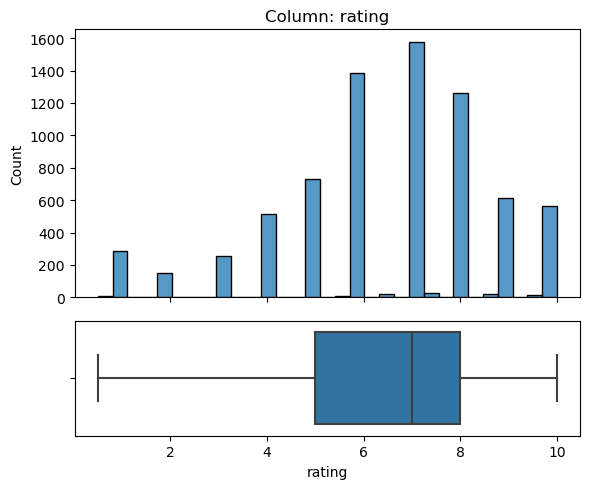

- NaN's Found: 1196 (13.83%)


In [7]:
# check for missing values for categorical cols

fn.explore_numeric(df,'rating')

<Axes: >

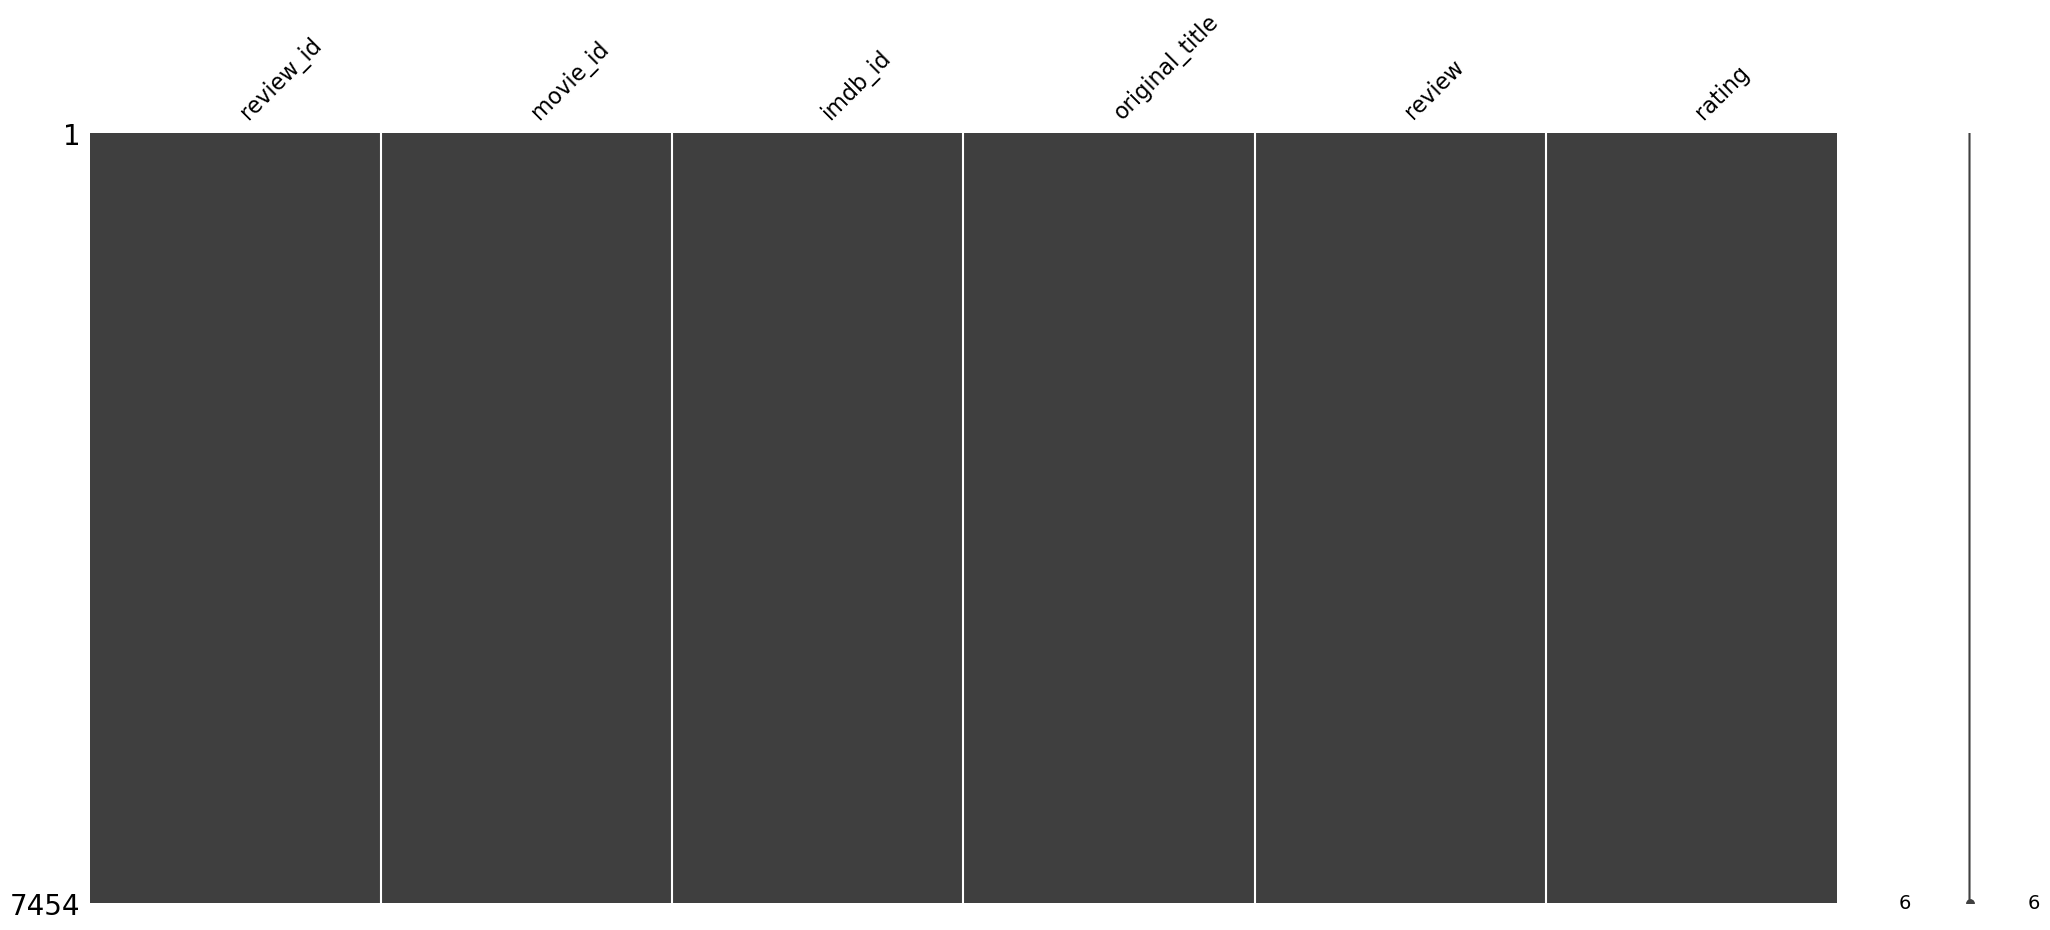

In [8]:
# Lets drop the reviews without rating

df = df.dropna(subset=['rating'])
missingno.matrix(df)

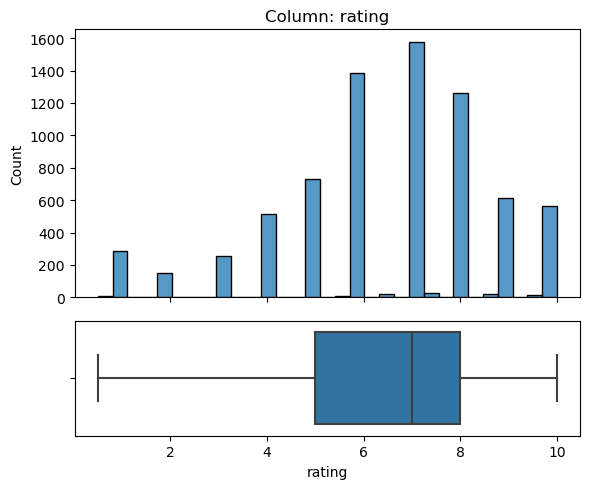

- NaN's Found: 0 (0.0%)


In [9]:
# recheck the rating distribution
fn.explore_numeric(df,'rating')

- High Rating : >=9
- Low Rating : <= 4

In [10]:
# Lets convert ratings into low and high categories

def high_low(x):
    if x >= 9:
        group = "high"
    elif x<=4:
        group="low"
    else:
        return None
    return group

In [11]:
# use map to rating coumn and convert rating to low and high

df['target'] = df['rating'].map(high_low)


In [12]:
df['target'].value_counts(dropna=True, normalize=True)

low     0.505994
high    0.494006
Name: target, dtype: float64

### NLP preprocessing

Lets preprocess the review text using spacy 

In [13]:
# disable the parcer and ner
import spacy
nlp = spacy.load("en_core_web_sm", disable=['parser','ner'])

In [14]:
nlp.pipe_names

['tok2vec', 'tagger', 'attribute_ruler', 'lemmatizer']

#### Lets check for any urls, html tags , special characters and remove them

In [15]:
http = df['review'].str.contains('http')
http.sum()


495

In [16]:
# removing reviews with http (urls)

df = df.loc[~(http)]
df.head(2)
# confirming for http
http = df['review'].str.contains('http')
http.sum()

0

In [17]:
# removing special character ★ 🤣
star_pattern = r'[★½]'
star = df['review'].str.contains(star_pattern)
star.sum()

613

In [18]:
# removing star from review 

df = df.loc[~(star)]

# confirming for http
star = df['review'].str.contains(star_pattern)
star.sum()

0

In [19]:
# import re
# pattern = re.compile("[★🤣]")
# text = "This is a string with a ★ and a 🤣 emoji."
# matches = pattern.findall(text)
# print("Matches:", matches)

In [20]:
# removing special character ★ 🤣
smile_pattern = r'[🤣]'
smile = df['review'].str.contains(smile_pattern)
smile.sum()

1

In [21]:
# removing smile from review 

df = df.loc[~(smile)]

# confirming for http
smile = df['review'].str.contains(smile_pattern)
smile.sum()

0

#### Tokenization

In [22]:
# using custom function batch_preprocess_texts() 

df['tokens'] = fn.batch_preprocess_texts(df['review'], nlp=nlp,                                              
                                           use_lemmas=False, 
                                           remove_stopwords=True,
                                          remove_punct=True)


6345it [00:44, 143.18it/s]


#### Lemmatization

In [23]:
df['lemmas'] = fn.batch_preprocess_texts(df['review'], nlp=nlp,                                           
                                              use_lemmas=True, 
                                           remove_stopwords=True,
                                          remove_punct=True)


6345it [00:44, 143.65it/s]


In [24]:
df.head(2)

,review_id,movie_id,imdb_id,original_title,review,rating,target,tokens,lemmas
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",7.0,None,"[fine, piece, cinema, wong, kar, wai, tells, story, people, circumstance, throws, way, expect, start, couples, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leaves, increasingly, loos...","[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leave, increasingly, loose, e..."
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",9.0,high,"[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]"


In [25]:
# Join list of tokens into a string with spaces between each token
df['tokens-joined'] = df['tokens'].map(lambda x: " ".join(x))
# Join list of lemmas into a string with spaces between each lemma
df['lemmas-joined'] = df['lemmas'].map(lambda x: " ".join(x))
df.head(2)

,review_id,movie_id,imdb_id,original_title,review,rating,target,tokens,lemmas,tokens-joined,lemmas-joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",7.0,None,"[fine, piece, cinema, wong, kar, wai, tells, story, people, circumstance, throws, way, expect, start, couples, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leaves, increasingly, loos...","[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leave, increasingly, loose, e...",fine piece cinema wong kar wai tells story people circumstance throws way expect start couples new building newspaper man wife business executive wife businessman rarely home journalist wife leaves increasingly loose ends long friendship develops...,fine piece cinema wong kar wai tell story people circumstance throw way expect start couple new building newspaper man wife business executive wife businessman rarely home journalist wife leave increasingly loose end long friendship develop usual...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",9.0,high,"[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation


#### Save as joblib 

In [26]:
import joblib
joblib.dump(df, "Data/nlp/processed-nlp-data.joblib")

['Data/nlp/processed-nlp-data.joblib']

In [27]:
# load the processed data again for checking
loaded = joblib.load("Data/nlp/processed-nlp-data.joblib")
loaded.head()

,review_id,movie_id,imdb_id,original_title,review,rating,target,tokens,lemmas,tokens-joined,lemmas-joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",7.0,None,"[fine, piece, cinema, wong, kar, wai, tells, story, people, circumstance, throws, way, expect, start, couples, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leaves, increasingly, loos...","[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leave, increasingly, loose, e...",fine piece cinema wong kar wai tells story people circumstance throws way expect start couples new building newspaper man wife business executive wife businessman rarely home journalist wife leaves increasingly loose ends long friendship develops...,fine piece cinema wong kar wai tell story people circumstance throw way expect start couple new building newspaper man wife business executive wife businessman rarely home journalist wife leave increasingly loose end long friendship develop usual...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",9.0,high,"[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
3,5f0c53a013a32000357ec505,7443,tt0120630,Chicken Run,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",8.0,None,"[good, stop, motion, animation, <, em>'chicken, run'</em, >, watched, crap, tonne, little, vast, number, years, impressive, production, given, came, 2000, despite, pretty, simple, feel, film, developed, concept, admittedly, short, run, time, trul...","[good, stop, motion, animation, <, em>'chicken, run'</em, >, watch, crap, tonne, little, vast, number, year, impressive, production, give, come, 2000, despite, pretty, simple, feel, film, develop, concept, admittedly, short, run, time, truly, fly...",good stop motion animation < em>'chicken run'</em > watched crap tonne little vast number years impressive production given came 2000 despite pretty simple feel film developed concept admittedly short run time truly flies course looks relatively ...,good stop motion animation < em>'chicken run'</em > watch crap tonne little vast number year impressive production give come 2000 despite pretty simple feel film develop concept admittedly short run time truly fly course look relatively terrific ...
4,64ecc027594c9400ffe77c91,7443,tt0120630,Chicken Run,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from the ""Great Escape"", ""Star Trek"" to "

## EDA

### Word Cloud

Create word clouds to visualize the most frequent and significant words in each group.

In [28]:
# load the preocess data to create word cloud

wordcloud = "Data/nlp/processed-nlp-data.joblib"
df = joblib.load(wordcloud)
df.head(2)

,review_id,movie_id,imdb_id,original_title,review,rating,target,tokens,lemmas,tokens-joined,lemmas-joined
0,64ecc16e83901800af821d50,843,tt0118694,花樣年華,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",7.0,None,"[fine, piece, cinema, wong, kar, wai, tells, story, people, circumstance, throws, way, expect, start, couples, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leaves, increasingly, loos...","[fine, piece, cinema, wong, kar, wai, tell, story, people, circumstance, throw, way, expect, start, couple, new, building, newspaper, man, wife, business, executive, wife, businessman, rarely, home, journalist, wife, leave, increasingly, loose, e...",fine piece cinema wong kar wai tells story people circumstance throws way expect start couples new building newspaper man wife business executive wife businessman rarely home journalist wife leaves increasingly loose ends long friendship develops...,fine piece cinema wong kar wai tell story people circumstance throw way expect start couple new building newspaper man wife business executive wife businessman rarely home journalist wife leave increasingly loose end long friendship develop usual...
1,57086ff5c3a3681d29001512,7443,tt0120630,Chicken Run,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",9.0,high,"[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation


Devide the the reviews in two groups (high and low) for word clould

In [29]:
df['target'].value_counts()

high    1091
low      943
Name: target, dtype: int64

In [30]:
group_low = df['target'] == "low"
group_high = df['target'] == "high"
group_low.sum(), group_high.sum()

(943, 1091)

Create two group of joined reviews for low and high reviews



In [31]:
low_reviews = " ".join( df.loc[group_low, 'review'])
low_reviews[:50]

'After quite entertainign Mission Impossible I the '

In [32]:
high_reviews = " ".join( df.loc[group_high, 'review'])
high_reviews[:50]

'A guilty pleasure for me personally, as I love bot'

In [33]:
# Join the tokens and make a single string
high_reviews_tokens = " ".join( df.loc[group_high, 'tokens-joined'])
low_reviews_tokens = " ".join( df.loc[group_low, 'tokens-joined'])

high_reviews_lemmas =  " ".join( df.loc[group_high, 'lemmas-joined'])
low_reviews_lemmas =  " ".join( df.loc[group_low, 'lemmas-joined'])

In [34]:
# Create lists of all lemmas in both high and low review groups


high_review_tokens_list = df.loc[group_high, 'tokens'].explode().to_list()
low_review_tokens_list = df.loc[group_low, 'tokens'].explode().to_list()

high_review_lemmas_list = df.loc[group_high, 'lemmas'].explode().to_list()
low_review_lemmas_list = df.loc[group_low, 'lemmas'].explode().to_list()

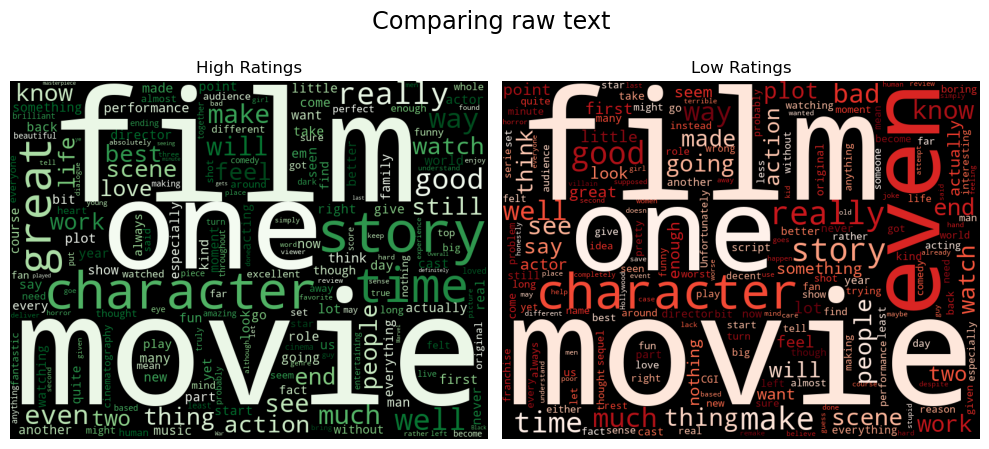

In [35]:
# using custom function generate word cloud for raw data
## Generate the WordCloud Images
wordcloud_kws = dict(min_word_length=2,width=800, height=600, random_state=42)
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(high_reviews)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(low_reviews)

fig = fn.plot_wordclouds(high_cloud, low_cloud, title="Comparing raw text ")

You can clearly see what words should be considered as stopwords based on this raw text comparision. 

In [36]:
from wordcloud import STOPWORDS

In [37]:
# Add more custom stopwords for EDA
custom_stopwords = [*STOPWORDS,'movie','film','character','story','★','one','really','even' ,'time','people']

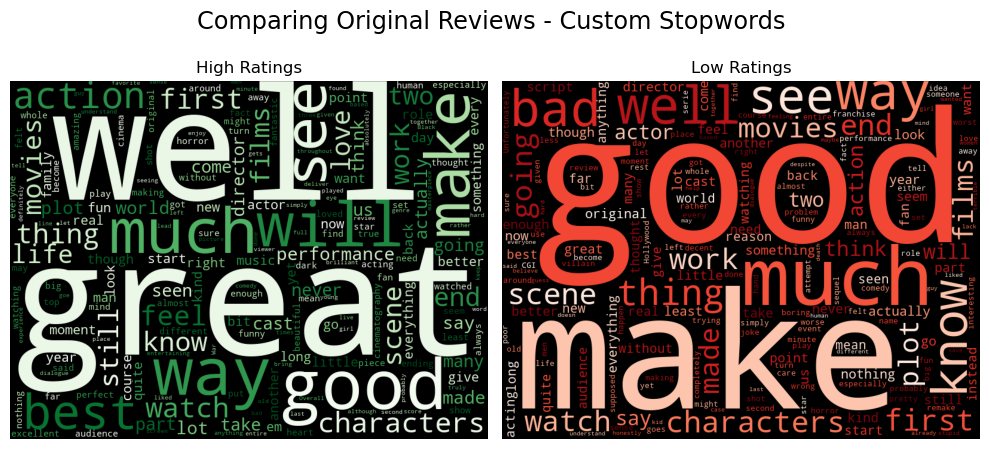

In [38]:
## Generate the WordCloud Images using the custom stopwords

wordcloud_kws = dict(min_word_length=2,width=800, height=600, random_state=42,stopwords=custom_stopwords)
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(high_reviews)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(low_reviews)

# ## Plot the Images
fig = fn.plot_wordclouds(high_cloud, low_cloud, title="Comparing Original Reviews - Custom Stopwords ")

Using Lemmas

Depending on the corpus, visualizing lemmas may provide a clearer view of the data.

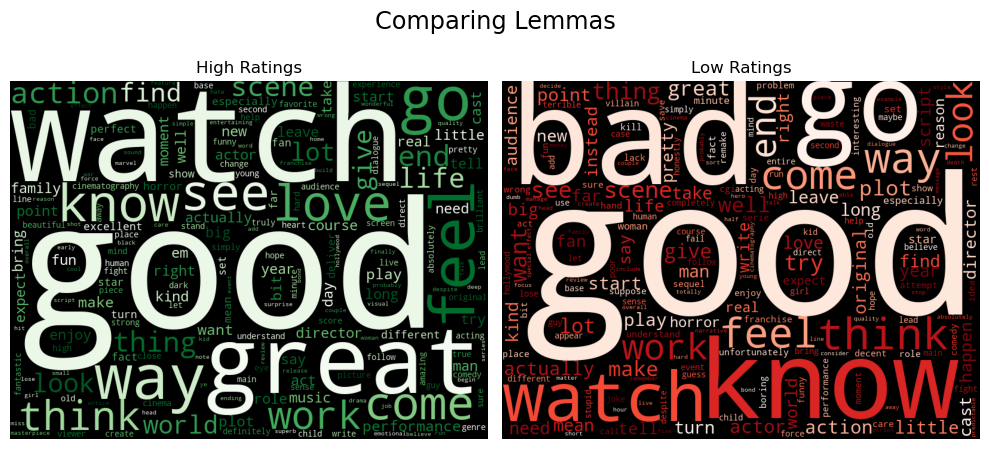

In [39]:
## Generate the WordCloud Images using the custom stopwords and lemmas

wordcloud_kws = dict(min_word_length=2,width=800, height=600, random_state=42,stopwords=custom_stopwords)
high_cloud = WordCloud(**wordcloud_kws, colormap='Greens').generate(high_reviews_lemmas)
low_cloud = WordCloud(**wordcloud_kws, colormap='Reds').generate(low_reviews_lemmas)

# ## Plot the Images
fig = fn.plot_wordclouds(high_cloud, low_cloud, title="Comparing Lemmas")

# save the word cloud image
fig.savefig("images/wordcloud-comparison.png", dpi=300, transparent=False, bbox_inches='tight')

### Frequency Distribution

In [40]:
from nltk import FreqDist

The NLTK FreqDist class expects a list of all tokens in all documents. We can create this with the .explode() method to create new rows for every word. We can then convert the resulting series to a list with to_list() to pass to the FreqDist class constructor.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 0 to 8649
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   review_id       6345 non-null   object 
 1   movie_id        6345 non-null   int64  
 2   imdb_id         6345 non-null   object 
 3   original_title  6345 non-null   object 
 4   review          6345 non-null   object 
 5   rating          6345 non-null   float64
 6   target          2034 non-null   object 
 7   tokens          6345 non-null   object 
 8   lemmas          6345 non-null   object 
 9   tokens-joined   6345 non-null   object 
 10  lemmas-joined   6345 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 594.8+ KB


In [42]:
## Create list of all lemmas in all documents
high_words = df['lemmas'].explode().to_list()
low_words = df['lemmas'].explode().to_list()
high_words[:10]

['fine',
 'piece',
 'cinema',
 'wong',
 'kar',
 'wai',
 'tell',
 'story',
 'people',
 'circumstance']

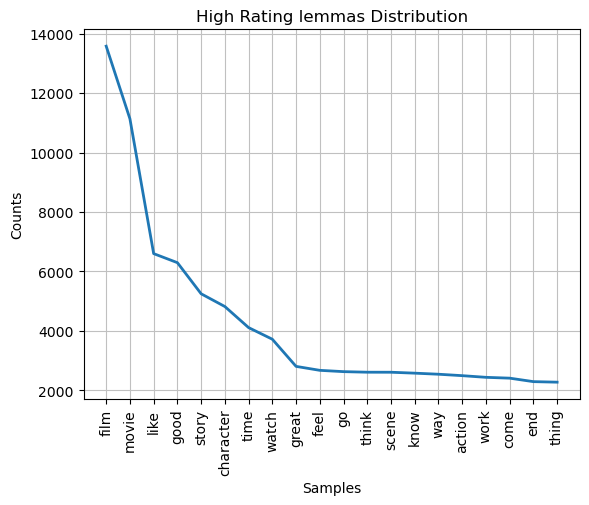

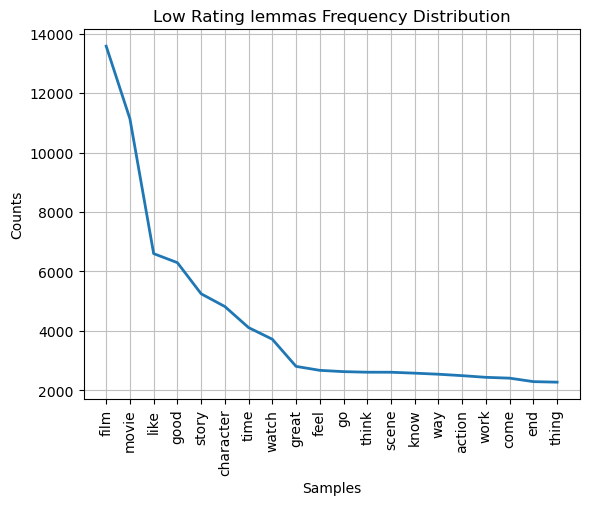

In [43]:
## Instantiate high frequency distribution
high_freq_dist = FreqDist(high_words)
low_freq_dist = FreqDist(low_words)

## Plot the distribution
high_freq_dist.plot(20, title='High Rating lemmas Distribution')

low_freq_dist.plot(20, title='Low Rating lemmas Frequency Distribution');

**There are still some words needs to be considered as stop words. We can go back and re visit preprocessing of NLP text review**

### Ngram Analysis

We can do something similar with ngrams. NLTK has native classes for finding and measuring the frequency of ngrams as well.

For this we need 2 objects: a measures class depending on the measure we want to see and a finder class based on the number of words in our ngram.

These classes exist for bi, tri, and quadgrams, Lets, start with bigrams.

#### Calcuate Frequency Scores

In [44]:
#use custom function to obtain BigramAssocMeasures raw frequency tokens
bigram_token_high = fn.get_ngram_measures_finder(high_review_tokens_list)
bigram_token_high.head(10)

,Words,Raw Freq
0,"(comic, book)",0.000484
1,"(special, effects)",0.000484
2,"(sci, fi)",0.000410
3,"(star, wars)",0.000402
4,"(action, movie)",0.000369
5,"(feel, like)",0.000353
6,"(john, wick)",0.000353
7,"(watch, movie)",0.000336
8,"(real, life)",0.000312
9,"(long, time)",0.000303


In [45]:
#use custom function to obtain BigramAssocMeasures raw frequency tokens
bigram_token_low = fn.get_ngram_measures_finder(low_review_tokens_list)
bigram_token_low.head(10)

,Words,Raw Freq
0,"(special, effects)",0.000658
1,"(feels, like)",0.000514
2,"(looks, like)",0.000452
3,"(waste, time)",0.000401
4,"(good, movie)",0.000380
5,"(feel, like)",0.000360
6,"(movie, like)",0.000360
7,"(star, wars)",0.000350
8,"(sci, fi)",0.000329
9,"(wo, watch)",0.000329


In [46]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

## Create measure classes
measures = BigramAssocMeasures()

## Create collector classes
high_finder = BigramCollocationFinder.from_words(high_review_tokens_list)
low_finder = BigramCollocationFinder.from_words(low_review_tokens_list)

In [47]:
## Calculate high-rating ngram scores
high_ngram_scores = high_finder.score_ngrams(measures.raw_freq)

# Save as a dataframe
high_ngram_scores_df = pd.DataFrame(high_ngram_scores, columns=['high ngram', 'high score'])


## Calculate low-rating ngram scores
low_ngram_scores = low_finder.score_ngrams(measures.raw_freq)
low_ngram_scores_df = pd.DataFrame(low_ngram_scores, columns=['low ngram', 'low score'])

## Display the frequency scores
display(high_ngram_scores_df.head(20),low_ngram_scores_df.head(20))

,high ngram,high score
0,"(comic, book)",0.000484
1,"(special, effects)",0.000484
2,"(sci, fi)",0.000410
3,"(star, wars)",0.000402
4,"(action, movie)",0.000369
5,"(feel, like)",0.000353
6,"(john, wick)",0.000353
7,"(watch, movie)",0.000336
8,"(real, life)",0.000312
9,"(long, time)",0.000303


,low ngram,low score
0,"(special, effects)",0.000658
1,"(feels, like)",0.000514
2,"(looks, like)",0.000452
3,"(waste, time)",0.000401
4,"(good, movie)",0.000380
5,"(feel, like)",0.000360
6,"(movie, like)",0.000360
7,"(star, wars)",0.000350
8,"(sci, fi)",0.000329
9,"(wo, watch)",0.000329


In [48]:
combined_df = pd.concat([high_ngram_scores_df,low_ngram_scores_df],axis =1)

In [49]:
combined_df.head(20)

,high ngram,high score,low ngram,low score
0,"(comic, book)",0.000484,"(special, effects)",0.000658
1,"(special, effects)",0.000484,"(feels, like)",0.000514
2,"(sci, fi)",0.000410,"(looks, like)",0.000452
3,"(star, wars)",0.000402,"(waste, time)",0.000401
4,"(action, movie)",0.000369,"(good, movie)",0.000380
5,"(feel, like)",0.000353,"(feel, like)",0.000360
6,"(john, wick)",0.000353,"(movie, like)",0.000360
7,"(watch, movie)",0.000336,"(star, wars)",0.000350
8,"(real, life)",0.000312,"(sci, fi)",0.000329
9,"(long, time)",0.000303,"(wo, watch)",0.000329


#### Ngram Frequency Comparision

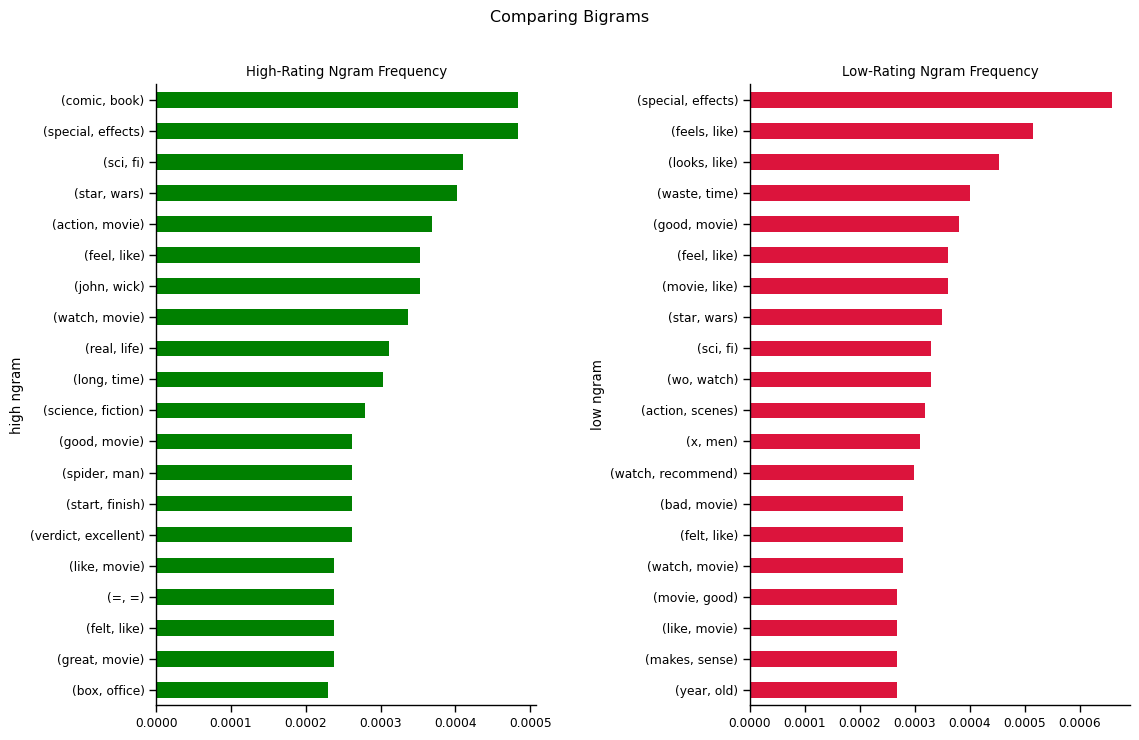

In [50]:
# Comparing frequency

with sns.plotting_context('paper'):
    fig = fn.plot_group_ngrams(low_ngram_scores_df, high_ngram_scores_df)

# Saving the bigrams as png file
fig.savefig("images/bigrams_frequency_comparison.png")

In [60]:
#### Bigrams frequency table

md_table = combined_df.head(20).to_markdown(index = False)


In [61]:
print(md_table)

| high ngram               |   high score | low ngram              |   low score |
|:-------------------------|-------------:|:-----------------------|------------:|
| ('comic', 'book')        |  0.000483789 | ('special', 'effects') | 0.000658057 |
| ('special', 'effects')   |  0.000483789 | ('feels', 'like')      | 0.000514107 |
| ('sci', 'fi')            |  0.000409991 | ('looks', 'like')      | 0.000452414 |
| ('star', 'wars')         |  0.000401791 | ('waste', 'time')      | 0.000401004 |
| ('action', 'movie')      |  0.000368992 | ('good', 'movie')      | 0.000380439 |
| ('feel', 'like')         |  0.000352592 | ('feel', 'like')       | 0.000359875 |
| ('john', 'wick')         |  0.000352592 | ('movie', 'like')      | 0.000359875 |
| ('watch', 'movie')       |  0.000336192 | ('star', 'wars')       | 0.000349593 |
| ('real', 'life')         |  0.000311593 | ('sci', 'fi')          | 0.000329029 |
| ('long', 'time')         |  0.000303393 | ('wo', 'watch')        | 0.000329029 |
| ('